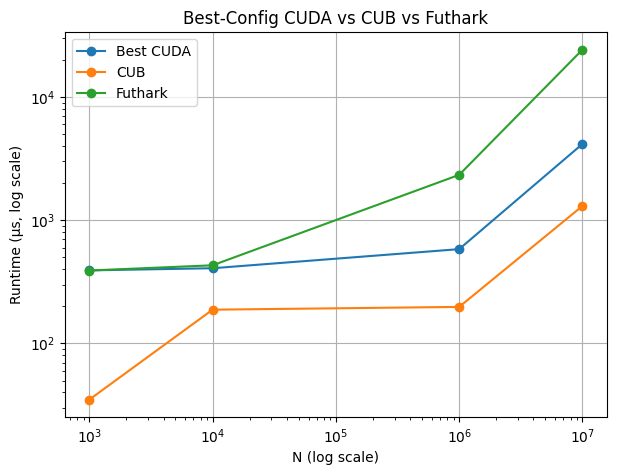

           N   Q    B  NUM_BITS  CUDA (µs)  Futhark (µs)  Cub (µs)
6       1000   1  256         8        392         391.0        35
27     10000   1  256         8        408         431.0       188
62   1000000  23  256         8        583        2338.0       198
74  10000000  23  128         4       4166       24283.0      1307


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results.csv")

# Get best CUDA config per N
best = df.loc[df.groupby("N")["CUDA (µs)"].idxmin()]

plt.figure(figsize=(7,5))
plt.plot(best["N"], best["CUDA (µs)"], marker="o", label="Best CUDA")
plt.plot(best["N"], best["Cub (µs)"], marker="o", label="CUB")
plt.plot(best["N"], best["Futhark (µs)"], marker="o", label="Futhark")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("N (log scale)")
plt.ylabel("Runtime (µs, log scale)")
plt.title("Best-Config CUDA vs CUB vs Futhark")
plt.grid(True)
plt.legend()
plt.show()


print(best[["N","Q","B","NUM_BITS","CUDA (µs)", "Futhark (µs)", "Cub (µs)"]])

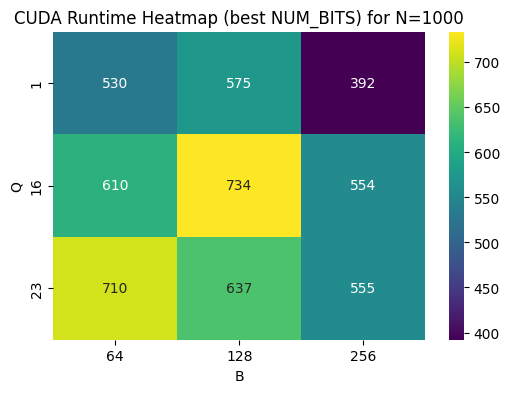

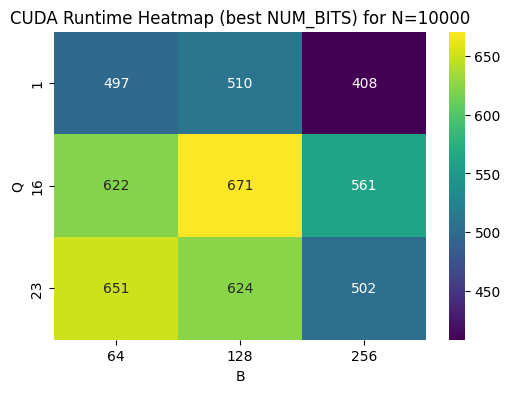

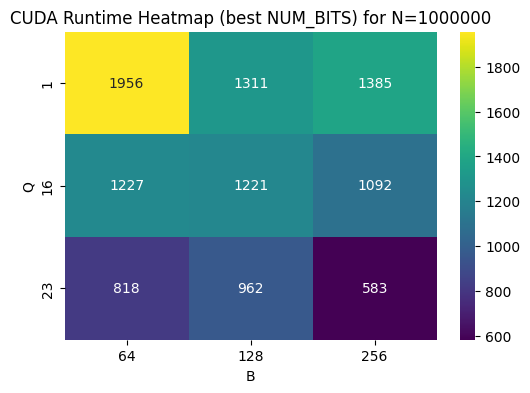

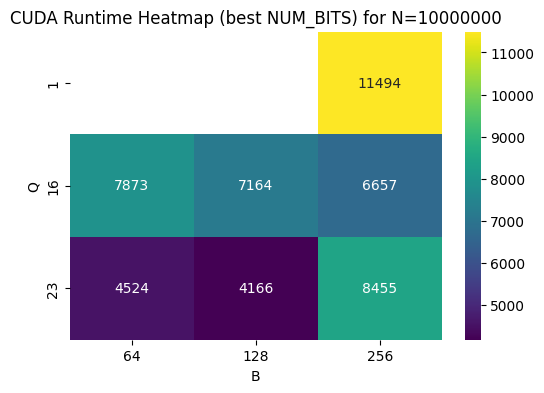

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("results.csv")

# Pick the best CUDA configuration per N, Q, B (minimum time)
df_bestbits = df.loc[df.groupby(["N","Q","B"])["CUDA (µs)"].idxmin()]

for N in df_bestbits["N"].unique():
    sub = df_bestbits[df_bestbits["N"] == N]
    pivot = sub.pivot(index="Q", columns="B", values="CUDA (µs)")
    
    plt.figure(figsize=(6,4))
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap="viridis")
    plt.title(f"CUDA Runtime Heatmap (best NUM_BITS) for N={N}")
    plt.xlabel("B")
    plt.ylabel("Q")
    plt.show()


In [10]:
import pandas as pd

df = pd.read_csv("results.csv")

# Average CUDA runtime per parameter combination
avg = (
    df.groupby(["Q", "B", "NUM_BITS"], as_index=False)["CUDA (µs)"]
      .mean()
      .rename(columns={"CUDA (µs)": "Mean CUDA (µs)"})
      .sort_values("Mean CUDA (µs)")
)

best_combo = avg.iloc[0]
print("=== Overall Best Parameters (by mean CUDA time) ===")
print(best_combo)


=== Overall Best Parameters (by mean CUDA time) ===
Q                  23.000000
B                 256.000000
NUM_BITS            4.000000
Mean CUDA (µs)    712.666667
Name: 19, dtype: float64


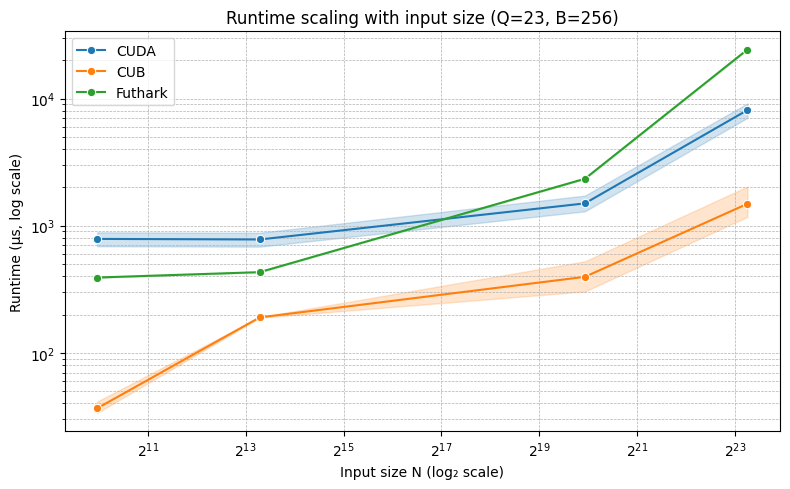

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("results.csv")

plt.figure(figsize=(8,5))
sns.lineplot(df, x="N", y="CUDA (µs)", label="CUDA", marker="o")
sns.lineplot(df, x="N", y="Cub (µs)", label="CUB", marker="o")
sns.lineplot(df, x="N", y="Futhark (µs)", label="Futhark", marker="o")

plt.xscale("log", base=2)
plt.yscale("log")
plt.xlabel("Input size N (log₂ scale)")
plt.ylabel("Runtime (µs, log scale)")
plt.title("Runtime scaling with input size (Q=23, B=256)")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()
